In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./mobile_price_data.csv')
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [3]:
df.shape

(459, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [5]:
df.isnull().sum()

mobile_name      0
mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [6]:
df.nunique()

mobile_name      363
mobile_price     139
mobile_color     165
dual_sim           2
disp_size         36
resolution        48
os                18
num_cores          3
mp_speed          18
int_memory         7
ram                7
p_cam             49
f_cam             15
network           18
bluetooth          1
battery_power     34
mob_width         70
mob_height        81
mob_depth         55
mob_weight        62
dtype: int64

In [8]:
df.dual_sim.value_counts()

Dual Sim      458
Single Sim      1
Name: dual_sim, dtype: int64

In [12]:
df[df['dual_sim'] == 'Single Sim']
df.drop(108,inplace=True)

In [13]:
df.dual_sim.value_counts()

Dual Sim    458
Name: dual_sim, dtype: int64

In [14]:
df.int_memory.value_counts()

64 GB     185
128 GB    126
32 GB      91
256 GB     30
16 GB      23
512 GB      2
8 GB        1
Name: int_memory, dtype: int64

In [19]:
df[df['int_memory']== '8 GB']
df.drop([301,302,300],inplace=True)

In [20]:
df.int_memory.value_counts()

64 GB     185
128 GB    126
32 GB      91
256 GB     30
16 GB      23
Name: int_memory, dtype: int64

<AxesSubplot:xlabel='int_memory', ylabel='count'>

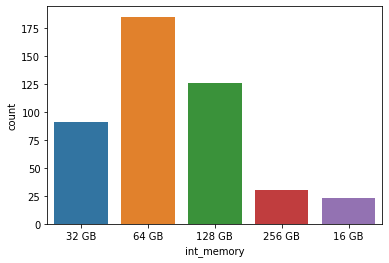

In [26]:
sns.countplot(df.int_memory)

In [31]:
mobile_names = []

for name in df.mobile_name:
    mobile_names.append(name.split('(')[0])

In [33]:
mobile_names = [name.strip() for name in mobile_names]

In [38]:
len(mobile_names)

455

In [37]:
prices = [int(price.replace('₹','').replace(',','').strip()) for price in df.mobile_price]
len(prices)

455

In [40]:
pd.unique(df.battery_power)

array(['5000 mAh', '4035 mAh', '4000 mAh', '3500 mAh', '4200 mAh',
       '4300 mAh', '4230 mAh', '5020 mAh', '4030 mAh', '3400 mAh',
       '3080 mAh', '3010 mAh', '4780 mAh', '4100 mAh', '3000 mAh',
       '4500 mAh', '3700 mAh', '3260 mAh', '3360 mAh', '3225 mAh',
       '2730 mAh', '6000 mAh', '2600 mAh', '3600 mAh', '4350 mAh',
       '4025 mAh', '4065 mAh', '3730 mAh', '3180 mAh', '4020 mAh',
       '3075 mAh', '3200 mAh'], dtype=object)

In [41]:
df.battery_power.value_counts()

4000 mAh    135
5000 mAh     87
4230 mAh     38
4500 mAh     34
4030 mAh     22
3260 mAh     14
3000 mAh     11
4200 mAh     10
5020 mAh      9
3010 mAh      9
3080 mAh      7
4020 mAh      6
3180 mAh      6
3360 mAh      6
4035 mAh      6
3700 mAh      5
4300 mAh      5
3500 mAh      5
4100 mAh      4
4780 mAh      4
3400 mAh      4
6000 mAh      4
3600 mAh      4
3075 mAh      4
4350 mAh      3
4025 mAh      3
4065 mAh      3
2730 mAh      2
3730 mAh      2
3225 mAh      1
2600 mAh      1
3200 mAh      1
Name: battery_power, dtype: int64

In [43]:
battery_power = []
for battery in df.battery_power:
    battery_power.append(int(battery.split(' ')[0].strip()))
len(battery_power)

455

In [44]:
bins = [2500,3600,4700,6100]
labels = ['Low','Medium','Large']
battery_power = pd.cut(battery_power,bins=bins,include_lowest=True,labels = labels)
battery_power

['Large', 'Large', 'Large', 'Large', 'Large', ..., 'Low', 'Low', 'Low', 'Medium', 'Medium']
Length: 455
Categories (3, object): ['Low' < 'Medium' < 'Large']

In [45]:
df.p_cam.value_counts()

13MP + 2MP                                                                                      72
13MP Rear Camera                                                                                44
48MP + 8MP + 2MP + 2MP                                                                          39
12MP + 5MP                                                                                      38
64MP + 8MP + 2MP + 2MP                                                                          22
48MP + 5MP                                                                                      21
48MP + 13MP + 8MP                                                                               17
48MP + 8MP + 5MP + 2MP                                                                          16
64MP + 13MP + 8MP + 2MP                                                                         15
12MP + 2MP                                                                                      12
12MP Rear 

In [46]:
df.f_cam.value_counts()

16MP Front Camera               112
8MP Front Camera                 65
20MP Front Camera                61
5MP Front Camera                 54
32MP Front Camera                51
13MP Front Camera                45
20MP + 2MP Dual Front Camera     16
32MP + 8MP Dual Front Camera     13
25MP Front Camera                13
24MP Front Camera                 7
16MP + 8MP Dual Front Camera      6
8MP Dual Front Camera             6
13MP + 2MP Dual Front Camera      3
44MP + 2MP Dual Front Camera      3
Name: f_cam, dtype: int64

In [52]:
roms = [int(rom.split(' ')[0]) for rom in df.int_memory]
len(roms)

455

In [54]:
rams = [int(ram.split(' ')[0]) for ram in df.ram]
len(rams)

455

In [56]:
f_cams = [int(f_cam.split(' ')[0].replace('MP','')) for f_cam in df.f_cam]
len(f_cams)

455

In [57]:
df_new = pd.DataFrame({'Name':mobile_names,'Color':df.mobile_color,
                    'ROM(GB)':roms,'RAM(GB)':rams,'Power':battery_power,
                    'f_cam(MP)':f_cams,'Price':prices})
df_new.head()

,Name,Color,ROM(GB),RAM(GB),Power,f_cam(MP),Price
0,Realme Narzo 10A,So White,32,3,Large,5,8999
1,Realme Narzo 10A,So Blue,32,3,Large,5,8999
2,Realme Narzo 10A,So Blue,64,4,Large,5,9999
3,Realme Narzo 10A,So White,64,4,Large,5,9999
4,Realme Narzo 10,That Green,128,4,Large,16,11999


In [58]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 458
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       455 non-null    object  
 1   Color      455 non-null    object  
 2   ROM(GB)    455 non-null    int64   
 3   RAM(GB)    455 non-null    int64   
 4   Power      455 non-null    category
 5   f_cam(MP)  455 non-null    int64   
 6   Price      455 non-null    int64   
dtypes: category(1), int64(4), object(2)
memory usage: 41.6+ KB


In [59]:
df_new.Name.nunique()

124

In [60]:
df_new.Color.nunique()

161

In [74]:
df_new['Power'] = df_new['Power'].replace(['Large','Medium','Low'],[3,2,1])

In [75]:
df_new.head()

,Name,Color,ROM(GB),RAM(GB),Power,f_cam(MP),Price,Power_dummy
0,Realme Narzo 10A,So White,32,3,3,5,8999,0.0
1,Realme Narzo 10A,So Blue,32,3,3,5,8999,0.0
2,Realme Narzo 10A,So Blue,64,4,3,5,9999,0.0
3,Realme Narzo 10A,So White,64,4,3,5,9999,0.0
4,Realme Narzo 10,That Green,128,4,3,16,11999,0.0


In [76]:
df_new.drop(columns = ['Power_dummy'],inplace=True)

In [78]:
# Target Encoding as large number of unique values
df_name = df_new.groupby('Name')['Price'].mean().reset_index()
df_name

,Name,Price
0,Infinix Hot 7,9999.000000
1,Infinix Hot 9,8999.000000
2,Infinix Hot 9 Pro,9999.000000
3,Infinix Hot S3,10856.142857
4,Infinix Hot S3X,10999.000000
...,...,...
119,Vivo Y91,10740.000000
120,Vivo Y91i,9470.500000
121,Vivo Y93,15493.333333
122,Vivo Z1Pro,15323.333333


In [79]:
df_color = df_new.groupby('Color')['Price'].mean().reset_index()

In [80]:
df_color

,Color,Price
0,Agate Red,10849.000000
1,Aqua Blue,9999.000000
2,Arctic White,28999.000000
3,Armoured Edition,20999.000000
4,Astral Blue,19319.000000
...,...,...
156,Unicorn White,18990.000000
157,Vanilla Mint,14656.666667
158,Violet,9719.000000
159,Waterfall Grey,16990.000000


In [83]:
df_new['Name'] = df_new['Name'].replace(list(df_name['Name']),list(df_name['Price']))


In [86]:
df_new['Color'] = df_new['Color'].replace(list(df_color['Color']),list(df_color['Price']))

In [94]:
x_cols = [col for col in df_new.columns if col != 'Price']
X = df_new[x_cols]
y = df_new['Price']

In [95]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [96]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
models = {
    'LR':LinearRegression(),
    'Ri':Ridge(alpha=1000),
    'La':Lasso(alpha=1000)}

In [97]:
from sklearn.metrics import mean_absolute_error

mse={}
adj_r2={}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    adj_r2[name] = round(model.score(x_test,y_test),3)
    mse[name] = mean_absolute_error(y_pred,y_test)

In [98]:
adj_r2

{'LR': 0.976, 'Ri': 0.976, 'La': 0.976}

In [99]:
mse

{'LR': 869.1075117617598, 'Ri': 896.0126197627665, 'La': 891.6791544694696}

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [103]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [104]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('adj_r2:',round(knn.score(X_test,y_test),3))
print('mse:',mean_absolute_error(y_test,y_pred))

adj_r2: 0.924
mse: 1649.1659340659337
